### Table of Contents:
#### Preamble
#### Popularity Dataset

1. Neural Networks
    - Learning Curves
    - Cross Validation
    - Evaluation Metrics
&nbsp;
&nbsp;
2. K Nearest Neighbours
    - Learning Curves
    - Cross Validation
    - Evaluation Metrics
&nbsp;
&nbsp;
3. Comparison Between Algorithms

#### Mobile App Feature Dataset


1. Neural Networks
    - Learning Curves
    - Cross Validation
    - Evaluation Metrics
&nbsp;
&nbsp;
2. K Nearest Neighbours
    - Learning Curves
    - Cross Validation
    - Evaluation Metrics
&nbsp;
&nbsp;
3. Comparison Between Algorithms



## Preamble

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import f1_score
from sklearn.metrics import zero_one_loss
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

import itertools

from IPython.display import Image

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Popularity Dataset

We have already seen this dataset already, hence no exploratory data analysis is required.

We convert shares into 'high shares' and 'low shares' based on prior knowledge about the dataset.

In [3]:
df1 = pd.read_csv('OnlineNewsPopularity.csv')
df1.columns = df1.columns.str.strip()

Median is 1400.0
Mean is 3395


(1, 10000)

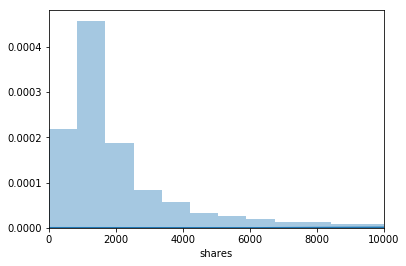

In [4]:
print('Median is {}'.format(round(np.median(df1['shares'])), 2))
print('Mean is {}'.format(round(np.mean(df1['shares'])), 2))
g = sns.distplot(df1['shares'], bins = 1000)
g.set_xlim(1, 10000)

In [5]:
df1['shares'] = np.where(df1['shares'] >= 1500, 1, 0)

Let's decide shares > 1500 to be high shares (class 1) and less than 1500 shares are low shares (class 0)

##### Scaling the variables using MinMaxScaler
Various attributes have different range of values they take. For e.g. n_tokens_title is usually in double digits whereas n_tokens_content is in three digits.
Hence, it is important that we bring all the attributes on the same scale. For this purpose we use MinMax Scaler from sklearn library.

__MinMaxScaler__ 
This estimator scales and translates each feature individually such that it is in the given range on the training set, i.e. between zero and one. This transformation is often used as an alternative to zero mean, unit variance scaling.

The transformation is given by:
```
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

X_scaled = X_std * (max - min) + min
```
where min, max = feature_range.

In [6]:
df = df1.copy()
del df['url']
del df['timedelta']

scaler = MinMaxScaler()
scaler.fit(df)
df =np.array(scaler.transform(df))

In [7]:
cols = df.shape[1]                                                         #Number of columns
df_X = df[:,0:cols-1]                                                      #Filter independent variables
df_y = df[:,cols-1:cols]

#Train and test splits
X_train,X_test,y_train,y_test = train_test_split(df_X,df_y,test_size=0.3, random_state = 5531)

## We will classify anything more than 3rd quartile as high shares##
#y_train = np.where(y_train > np.median(y_train), 1, 0)                   #For logistic regression
#y_test = np.where(y_test > np.median(y_train), 1, 0)                     #For logistic regression

y_train = np.array(y_train).flatten()                                    #For linear regression
y_test = np.array(y_test).flatten()                                      #For linear regression


## Neural Networks

**Learning Curve of error vs hidden layer sizes for activation function: Sigmoid, Tanh, ReLU**

Text(0,0.5,'Error rate')

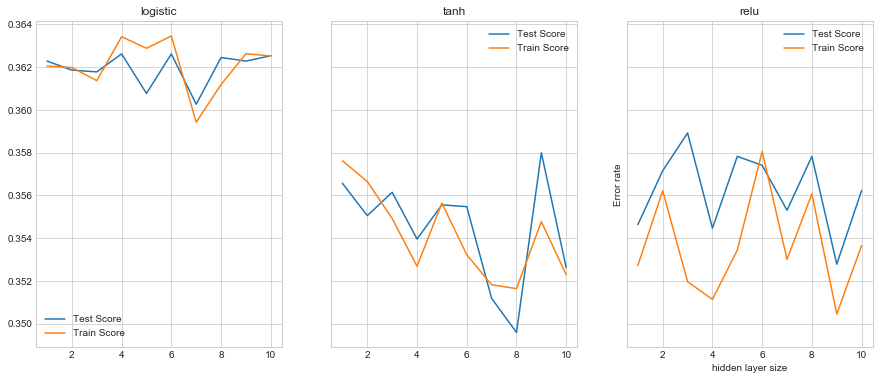

In [8]:
sns.set_style('whitegrid')
fig, axs = plt.subplots(1,3, figsize=(15, 6), facecolor='w', edgecolor='k', sharex=True, sharey=True)

axs = axs.ravel()

hidden_layer_sizes = [(5), (5,5), (5,5,5), (5,2,5,2), (10), (10,5), (10,5,5), (10,5,5,3), (5,4,3), (5,3,4)]
activation = ['logistic', 'tanh', 'relu']
    
for k in range(0, len(activation)):
    
    error_test=[]
    error_train=[]
    for i in range(0, len(hidden_layer_sizes)):
        mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes[i], max_iter=20, activation = activation[k], tol=1e-4, random_state=23832)
    
        mlp.fit(X_train, y_train)

        error_test.append(zero_one_loss(y_test, mlp.predict(X_test)))
        error_train.append(zero_one_loss(y_train, mlp.predict(X_train)))

    
    
    
    axs[k].plot([1,2,3,4,5,6,7,8,9,10], error_test)
    axs[k].plot([1,2,3,4,5,6,7,8,9,10], error_train)

    axs[k].set_title(activation[k])

    axs[k].legend(['Test Score', 'Train Score'])
    
plt.xlabel("hidden layer size")
plt.ylabel("Error rate")
    
    

The best model seems to be with Tanh activation function and 4 layers of 10, 5, 5 and 3 nodes each respectively.
Let's use cross validation and plot a learning curve between sample size and error to find out the presence of bias or variance!

**Cross-validation**

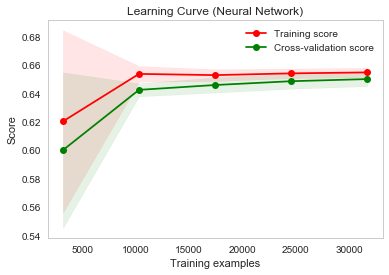

In [9]:
sns.set(style="whitegrid")

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


X, y = df_X, df_y


title = "Learning Curve (Neural Network)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=23432)

estimator = MLPClassifier(hidden_layer_sizes=(10,5,5,3), activation = 'tanh', tol=1e-4, random_state=23832)
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)

plt.show()

From the above chart, we can conclude the absence of high variance as score doesn't really improve much as we increase the training set.  
Although, model does look little biased but this id probably because we have not done any feature engineering yet.

In [10]:
# Traing ANN
mlp = MLPClassifier(hidden_layer_sizes=(10,5,5,3), activation = 'tanh', tol=1e-4, random_state=23832)
mlp.fit(X_train, y_train)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 5, 5, 3), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=23832,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

Confusion matrix, without normalization
[[4036 1984]
 [2154 3720]]
Normalized confusion matrix
[[ 0.67  0.33]
 [ 0.37  0.63]]


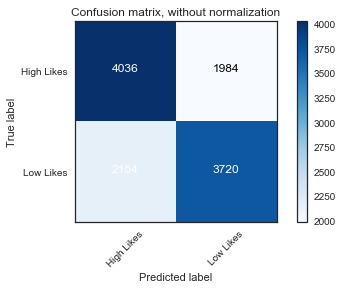

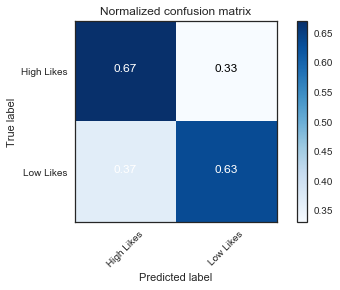

In [11]:
sns.set_style('white')

## Confusion Matrix

class_names = ['High Likes', 'Low Likes']

y_pred = mlp.predict(X_test)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [12]:
print('f1 score for training dataset is {}' .format(round(f1_score(y_train, mlp.predict(X_train)), 2)))

print('f1 score for training dataset is {}' .format(round(f1_score(y_test, mlp.predict(X_test)), 2)))

f1 score for training dataset is 0.65
f1 score for training dataset is 0.64


Model is well generalized after the experimentation with layer sizes and activation function.  
F1 score can be improved by experimenting with the features (in next assignment), this will also help us reducing the bias.

## KNN

We will use **euclidean distance** as it will help us find the articles most similar to each other.    
In Cartesian coordinates, if p = (p1, p2,..., pn) and q = (q1, q2,..., qn) are two points in Euclidean n-space, then the distance (d) from p to q, or from q to p is given by the Pythagorean formula:

\begin{aligned}d(\mathbf {p} ,\mathbf {q} )=d(\mathbf {q} ,\mathbf {p} )&={\sqrt {(q_{1}-p_{1})^{2}+(q_{2}-p_{2})^{2}+\cdots +(q_{n}-p_{n})^{2}}}\\[8pt]&={\sqrt {\sum _{i=1}^{n}(q_{i}-p_{i})^{2}}}.\end{aligned}
\begin{aligned}d(\mathbf {p} ,\mathbf {q} )=d(\mathbf {q} ,\mathbf {p} )&={\sqrt {(q_{1}-p_{1})^{2}+(q_{2}-p_{2})^{2}+\cdots +(q_{n}-p_{n})^{2}}}\\[8pt]&={\sqrt {\sum _{i=1}^{n}(q_{i}-p_{i})^{2}}}.\end{aligned}

**Learning Curve of error vs number of neighbours**

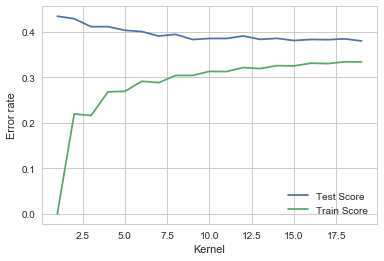

In [15]:
sns.set_style('whitegrid')
#fig, axs = plt.subplots(3,1, figsize=(8, 20), facecolor='w', edgecolor='k', sharex=True, sharey=True)

#axs = axs.ravel()

kvalue = range(1,20,1)
    
#for k in range(0, len(algo)):
    
error_test=[]
error_train=[]
for i in range(0, len(kvalue)):
    knn = KNeighborsClassifier(n_neighbors= kvalue[i])
    knn.fit(X_train, y_train)

    error_test.append(zero_one_loss(y_test, knn.predict(X_test)))
    error_train.append(zero_one_loss(y_train, knn.predict(X_train)))

    

plt.plot(kvalue, error_test)
plt.plot(kvalue, error_train)
plt.xlabel('Kernel')
plt.ylabel('Error rate')

plt.legend(['Test Score', 'Train Score'])

- Optimum value of k is 10
- It takes a lot of time to run, hence not desirable
- High training time is because KNN is a lazy learner

In [21]:
knn = KNeighborsClassifier(n_neighbors= 10, p=2)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

Confusion matrix, without normalization
[[4407 1613]
 [2975 2899]]
Normalized confusion matrix
[[ 0.73  0.27]
 [ 0.51  0.49]]


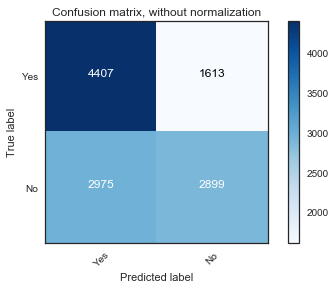

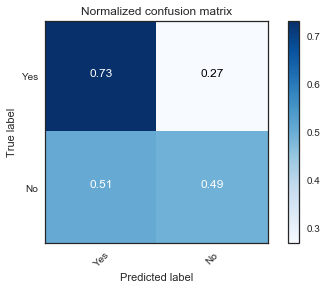

In [22]:
sns.set_style('white')

## Confusion Matrix
class_names = ['Yes', 'No']

y_pred = knn.predict(X_test)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [23]:
print('f1 score for training dataset is {}' .format(round(f1_score(y_train, knn.predict(X_train)), 2)))

print('f1 score for training dataset is {}' .format(round(f1_score(y_test, knn.predict(X_test)), 2)))

f1 score for training dataset is 0.65
f1 score for training dataset is 0.56


## Comparison Between Various Algorithms from Assignments

| **Algorithm**       | **F Score**        |
|---------------------|--------------------|
| Linear Regrassion   | 0.00069 (R square) |
| Logistic Regression | 0.79               |
| SVM                 | 0.64               |
| Decision Tree       | 0.61               |
| Boosting (AdaBoost) | 0.66               |
| Neural Network      | 0.65               |
| KNN                 | 0.65               |

Logistic regression performs the best here. Although none of the implemented algorithms have resulted in a satifactory model.  
Reason why these algorithms couldn't do well is probably because of the we feeded all the attributes into them without any tranformations or dimensionality reduction.  
Although, even after feature engineering we should not expect a totally great result as the distribution of shares is itself skewed.

**What additional thing can we do to improve our results?**  
We can do feature transformations and dimentionality reduction in order to improve results and get around the curse of dimensionality.  
**Why did KNN took so long to run?**  
We used scikit learn implemntation which is slower but can be made faster using cython. Also, KNN is a lazy learner which makes it's training slower than other learners.  
**Would cross validation help?**  
Yes, but we have not implemented cross validation for KNN in this dataset as it was computationally getting heavy for the system. For rest of the algorithm and dataset, cross validation has been carried out and been useful.


# Mobile App Feature Dataset

Below is the data description. Out aim is to identify if a user will respond to the new feature of the app.

- seller_id: ID of the seller, just like a row number
- user_status: Internal status of the user
- days_since_joined: The number of days since the user registered
- total_orders: The number of orders placed by the user since joining
- total_order_value: The total monetary value of all orders placed by the user since joining
- total_listings: The number of items listed on poshmark by the user since joining
- total_followers: The number of other users following this user as of now
- total_brands_shown: The unique number of brands shown within all listings created by the user
- total_categories_shown: The unique number of categories (handbags, shirts, etc.) shown within all listings created by the user
- current_listings_shown: The number of items listed as of now
- current_brands_shown: The unique number of brands shown within the current listings
- current_categories_shown: The unique number of categories shown within the current listings
- total_follows: The number of users that this user is following
- total_int_shares: Total items shared within the app by the user
- total_ext_shares: Total items shared to an external site (Facebook, Instagram, etc.) by the user
- binary_response: Did the user respond to the new feature (1 - Yes, 0 - No). All information pulled right before this.


** Our objective is to classify the users who respond to the new feature correctly i.e. we want to maximize TRUE POSITIVE RATE**

## Data Exploration

In [24]:
# Load data
df = pd.read_excel('RawDataSet.xls')
d = df
df.head()

,seller_id,days_since_joined,total_orders,total_order_value,total_listings,total_followers,total_brands_shown,total_categories_shown,current_listings_shown,current_brands_shown,current_categories_shown,total_follows,total_int_shares,total_ext_shares,binary_response
0,1,2392.0,4.0,1.40,80.0,470.0,37.0,22.0,NaN,NaN,NaN,9.0,0.0,0.0,0
1,2,2391.0,668.0,1676.94,626.0,4005.0,94.0,30.0,31.0,6.0,14.0,41.0,40.0,0.0,0
2,3,2290.0,827.0,1081.31,461.0,4105.0,187.0,30.0,15.0,4.0,12.0,85.0,130.0,6.0,0
3,4,2251.0,1319.0,2075.48,1334.0,8785.0,559.0,48.0,155.0,51.0,32.0,50.0,160.0,3.0,1
4,5,2222.0,1043.0,2207.50,1041.0,6305.0,350.0,28.0,64.0,15.0,20.0,8.0,0.0,0.0,0


In [25]:
# Let's describe the dataset
df.describe()

,seller_id,days_since_joined,total_orders,total_order_value,total_listings,total_followers,total_brands_shown,total_categories_shown,current_listings_shown,current_brands_shown,current_categories_shown,total_follows,total_int_shares,total_ext_shares,binary_response
count,5749.00000,5740.000000,5744.000000,5744.000000,5744.000000,5744.000000,5744.000000,5744.000000,5558.000000,5558.000000,5558.000000,5718.000000,5718.000000,5718.000000,5749.000000
mean,2875.00000,976.040941,566.155467,730.504136,1039.176706,7549.127786,305.732068,34.342618,299.742533,58.046599,21.941886,250.639909,43.812522,0.816894,0.395547
std,1659.73768,512.521728,789.427827,1543.338765,1093.568142,9336.172000,261.327233,6.999387,282.668876,54.922683,6.530176,949.959874,51.631908,2.135570,0.489010
min,1.00000,11.000000,4.000000,1.400000,17.000000,160.000000,0.000000,2.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000
25%,1438.00000,556.000000,191.000000,177.287500,438.000000,3205.000000,124.000000,30.000000,120.000000,17.000000,18.000000,11.000000,0.000000,0.000000,0.000000
50%,2875.00000,865.000000,347.000000,365.730000,743.500000,5180.000000,240.500000,34.000000,243.000000,44.000000,23.000000,23.000000,30.000000,0.000000,0.000000
75%,4312.00000,1414.000000,670.000000,751.250000,1263.000000,8740.000000,410.000000,40.000000,380.000000,84.000000,26.000000,107.000000,60.000000,0.000000,1.000000
max,5749.00000,2392.000000,19716.000000,46226.590000,15517.000000,234465.000000,3550.000000,50.000000,4930.000000,808.000000,38.000000,39490.000000,630.000000,33.000000,1.000000


In [26]:
# Handling Null values

## Delete the latest user (the last entry of the dataframe) as all the predictive attributes are null in that row
df = df[df['seller_id'] != 5749]

## Since data frame is sorted in decreasing order of days_since_joined, let's alot nearest value of days_since_joined for missing values
df['days_since_joined'] = df['days_since_joined'].interpolate(method='nearest')

## We drop the null value for current_listings_shown, current_brands_shown, current_categories_shown, total_follows, total_int_shares, total_ext_shares
## as they are only 3.7% of the remaining dataset

df = df.dropna()
del df['seller_id']
d = df

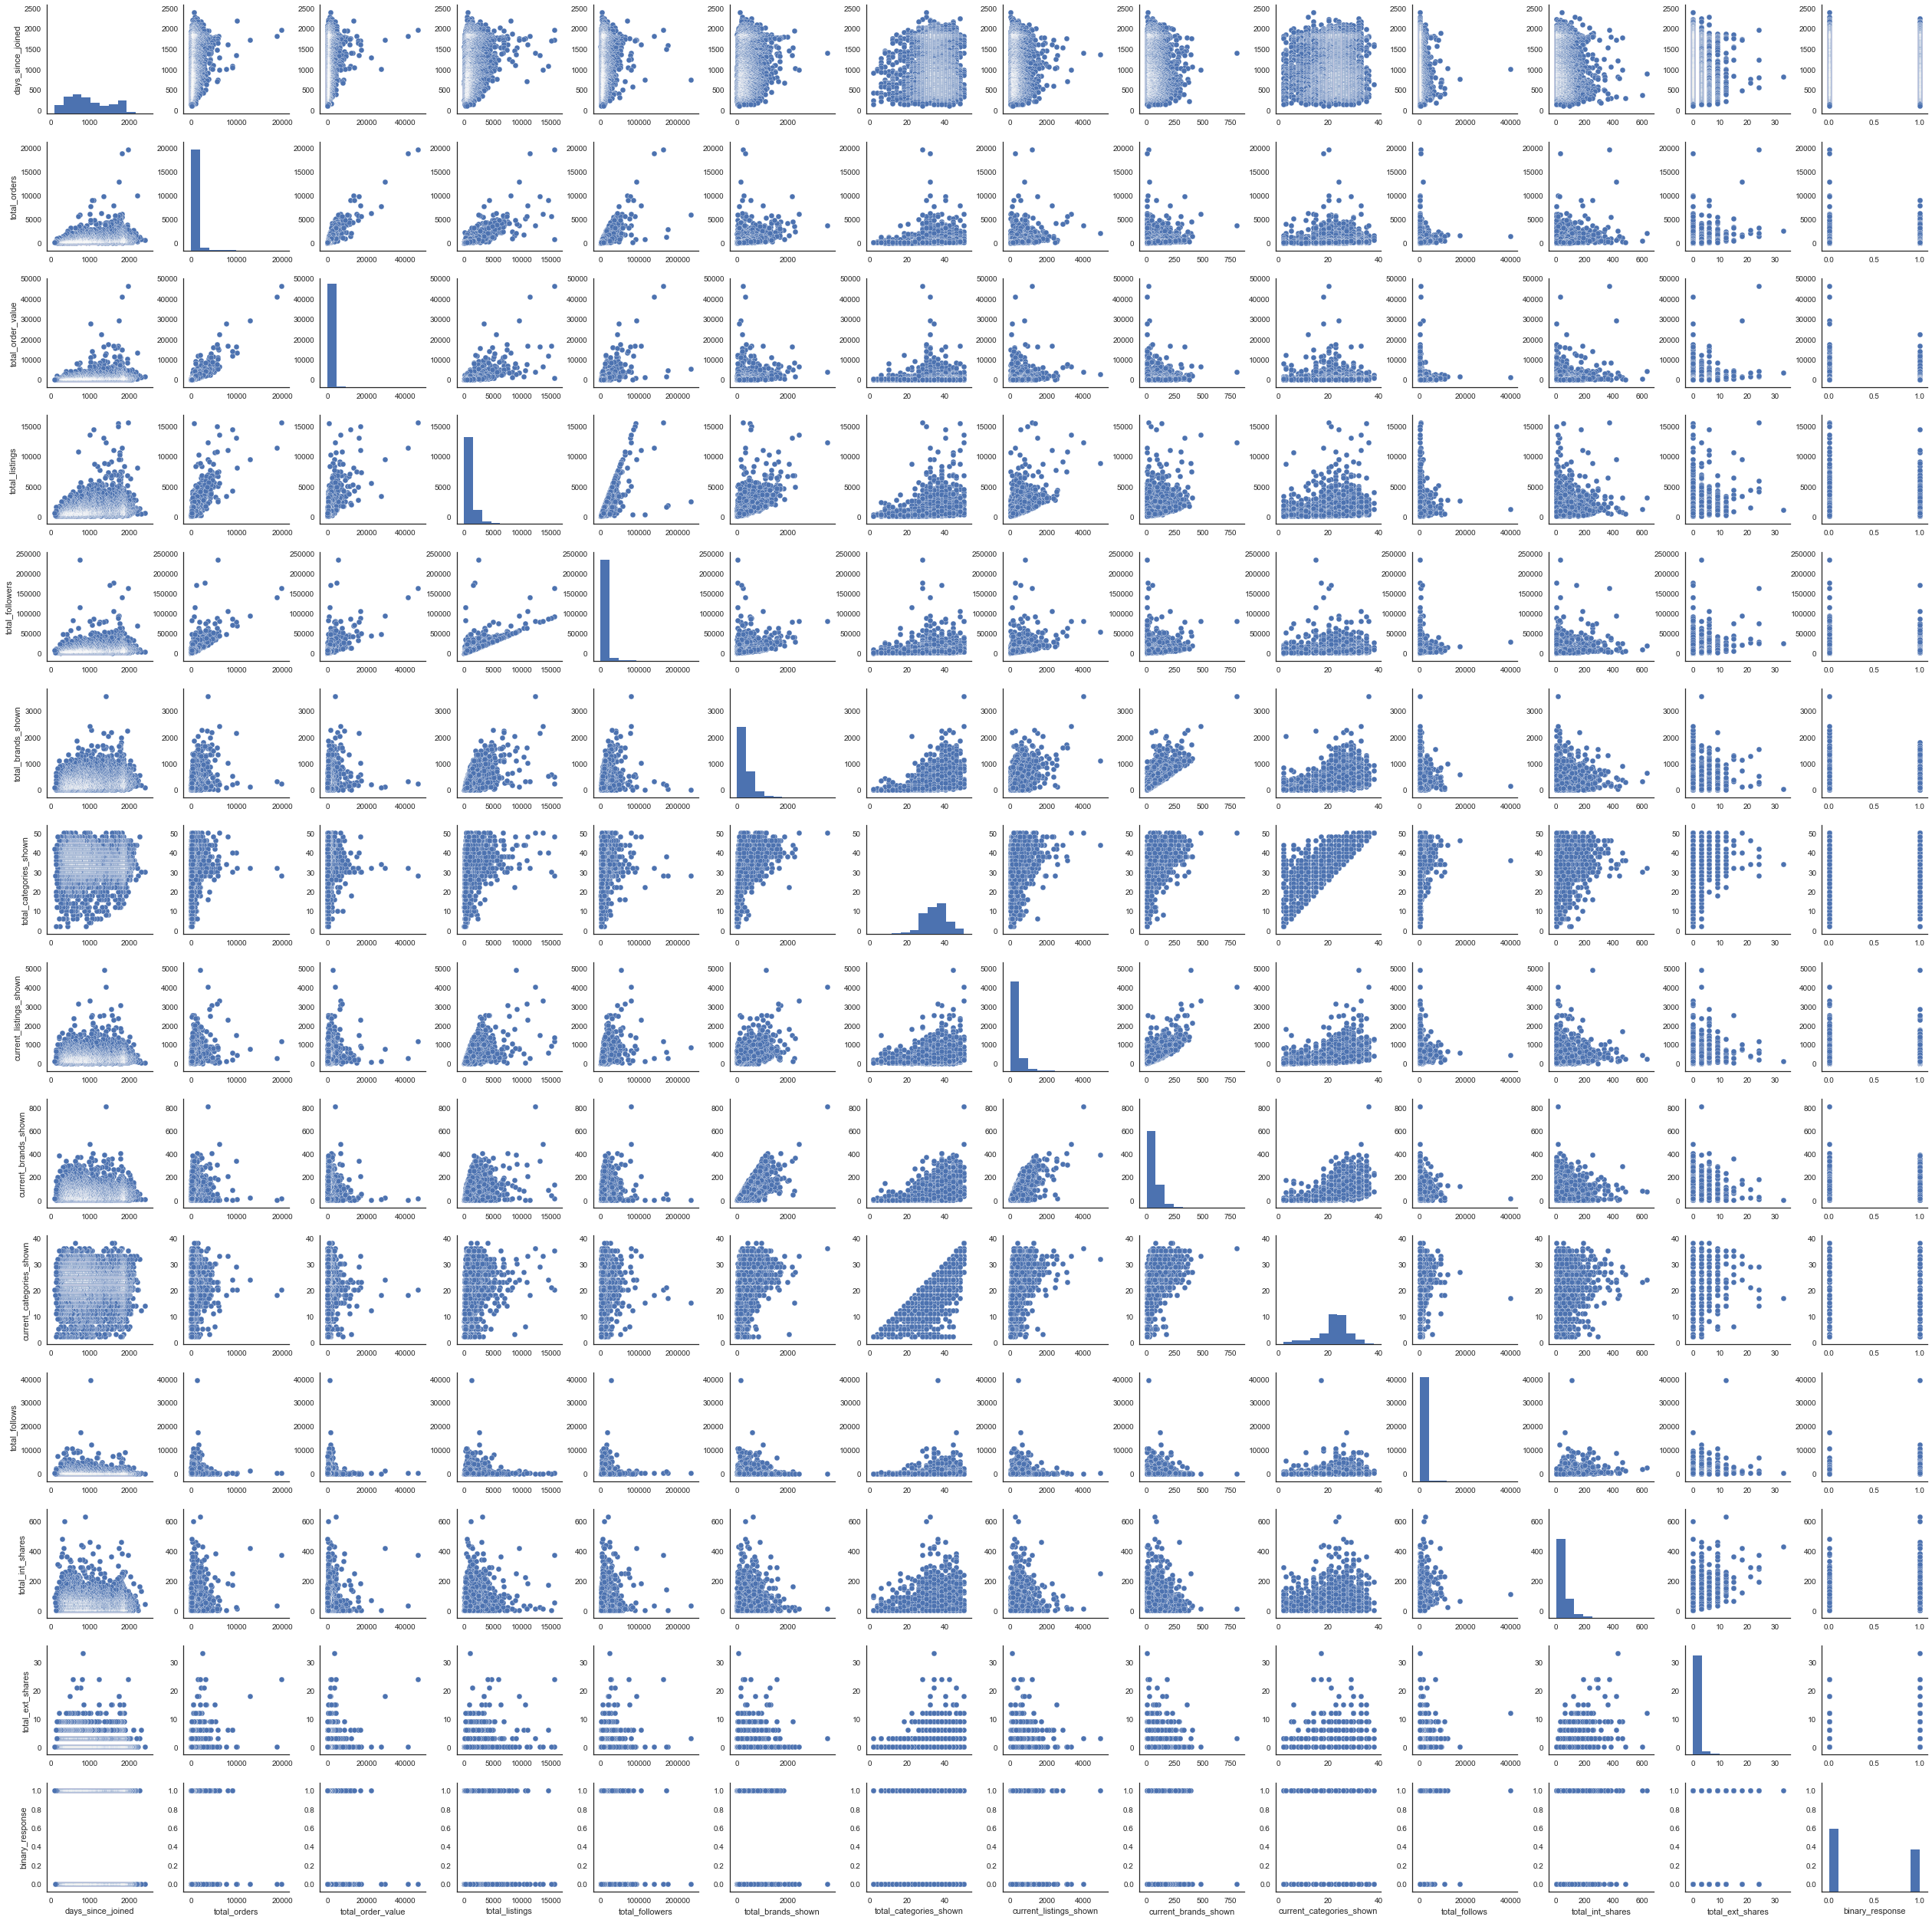

In [27]:
sns.pairplot(df)

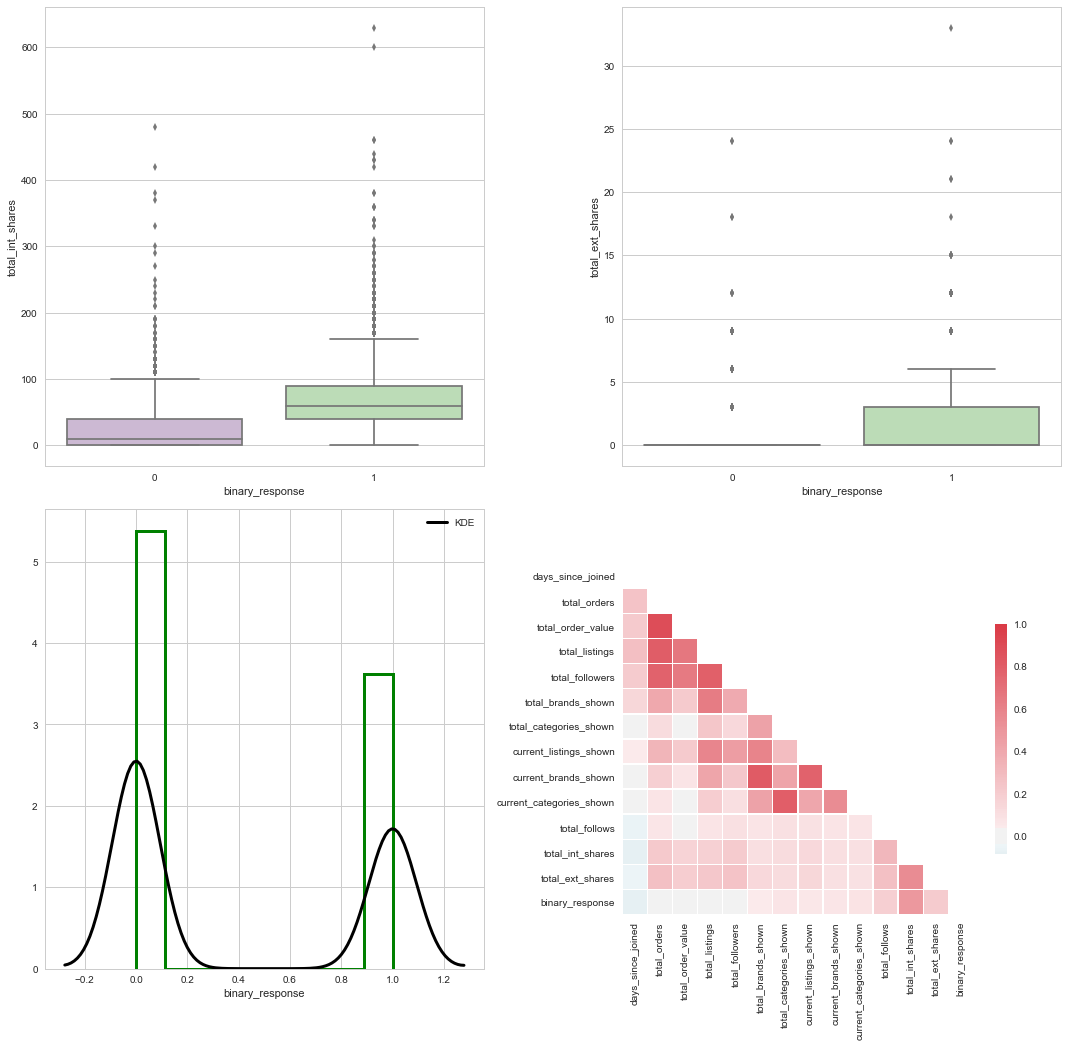

In [28]:
# Since our aim is to find if user responded to the new feature or not, let's see their covariance.
sns.set(style="whitegrid")

d = df
# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

f, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15))

sns.boxplot(y=df['total_int_shares'], x = df['binary_response'], palette="PRGn", ax = axes[0, 0])
sns.boxplot(y=df['total_ext_shares'], x = df['binary_response'], palette="PRGn", ax = axes[0, 1])

sns.distplot(df['binary_response'], kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                   hist_kws={"histtype": "step", "linewidth": 3,
                             "alpha": 1, "color": "g"}, ax = axes[1, 0])


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax = axes[1, 1])

plt.tight_layout()

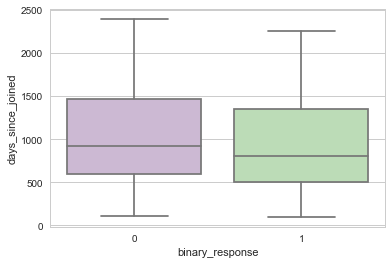

In [29]:
sns.boxplot(y=df['days_since_joined'], x = df['binary_response'], palette="PRGn")

- From the above pairplot and correlation plot, we can see that thte data is poorly correlated.
- Although newer users respond more new feature, it's a big factor as oldusers are receptive as well
- Number of data points for class 1 is 75% of that of class 0
- Users with more internal share have responded more to the new feature


In [30]:
scaler = MinMaxScaler()
scaler.fit(df)
df =np.array(scaler.transform(df))

cols = df.shape[1]                                                         #Number of columns
df_X = df[:,0:cols-1]                                                      #Filter independent variables
df_y = df[:,cols-1:cols]

#Train and test splits
X_train,X_test,y_train,y_test = train_test_split(df_X,df_y,test_size=0.25, random_state = 5554)

## Neural Networks

Learning curves to experiment with layer sizes, nodes and activation function.

Text(0,0.5,'Error rate')

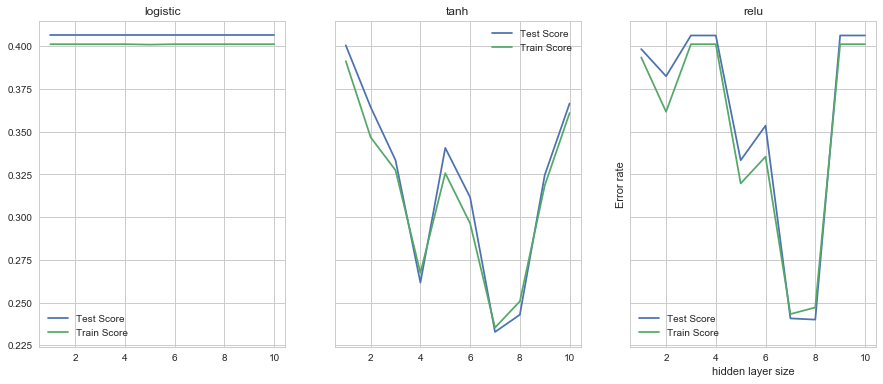

In [31]:
sns.set_style('whitegrid')
fig, axs = plt.subplots(1,3, figsize=(15, 6), facecolor='w', edgecolor='k', sharex=True, sharey=True)

axs = axs.ravel()

hidden_layer_sizes = [(5), (5,5), (5,5,5), (5,2,5,2), (10), (10,5), (10,5,5), (10,5,5,3), (5,4,3), (5,3,4)]
activation = ['logistic', 'tanh', 'relu']
    
for k in range(0, len(activation)):
    
    error_test=[]
    error_train=[]
    for i in range(0, len(hidden_layer_sizes)):
        mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes[i], max_iter=20, activation = activation[k], tol=1e-4, random_state=424216)
    
        mlp.fit(X_train, y_train)

        error_test.append(zero_one_loss(y_test, mlp.predict(X_test)))
        error_train.append(zero_one_loss(y_train, mlp.predict(X_train)))

    
    
    
    axs[k].plot([1,2,3,4,5,6,7,8,9,10], error_test)
    axs[k].plot([1,2,3,4,5,6,7,8,9,10], error_train)

    axs[k].set_title(activation[k])

    axs[k].legend(['Test Score', 'Train Score'])
    
plt.xlabel("hidden layer size")
plt.ylabel("Error rate")
    
    

The best model seems to be with Tanh activation function and 3 layers of 10, 5 and 5 nodes each.
Let's use cross validation and plot a learning curve between sample size and error to find out the presence of bias or variance!

**Cross Validation**

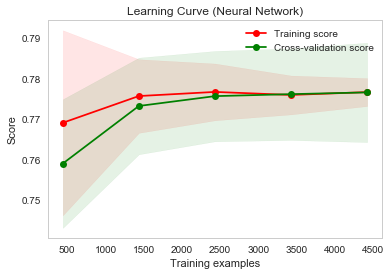

In [19]:
sns.set(style="whitegrid")

X, y = df_X, df_y


title = "Learning Curve (Neural Network)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=23732)

estimator = MLPClassifier(hidden_layer_sizes=(10,5,5), activation = 'tanh', tol=1e-4, random_state=424216)
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)

plt.show()

From the above chart, we can conclude the absence of high variance as score doesn't really improve much as we increase the training set.  
Model is also not very biased.

In [32]:
# Traing ANN
mlp = MLPClassifier(hidden_layer_sizes=(10,5,5), activation = 'tanh', tol=1e-4, random_state=424216)
mlp.fit(X_train, y_train)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 5, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=424216,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

Confusion matrix, without normalization
[[678 143]
 [162 400]]
Normalized confusion matrix
[[ 0.83  0.17]
 [ 0.29  0.71]]


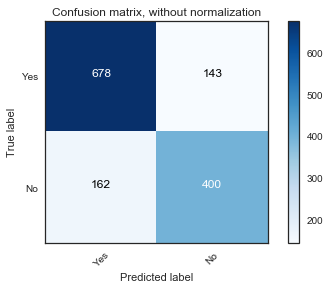

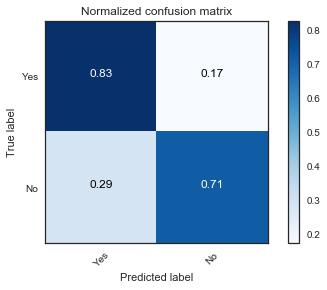

In [33]:
sns.set_style('white')

## Confusion Matrix
class_names = ['Yes', 'No']

y_pred = mlp.predict(X_test)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Model is well generalized after the experimentation with layer sizes and activation function.  
True positive rate can be improved by experimenting with the features (in next assignment).

## KNN
We will use **euclidean distance** as this problem requires to find users similar to each other. Each user is represented by a vector of features, hence euclidean distance is suitable.

Text(0,0.5,'Error rate')

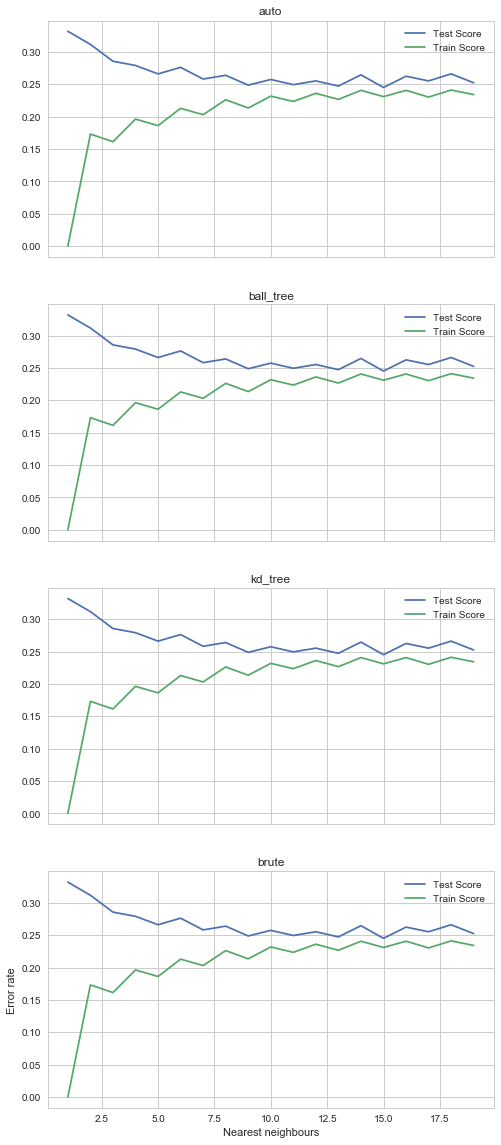

In [34]:
sns.set_style('whitegrid')
fig, axs = plt.subplots(4,1, figsize=(8, 20), facecolor='w', edgecolor='k', sharex=True, sharey=True)

axs = axs.ravel()

kvalue = range(1,20,1)
algo = ['auto', 'ball_tree', 'kd_tree', 'brute']
    
for k in range(0, len(algo)):
    
    error_test=[]
    error_train=[]
    for i in range(0, len(kvalue)):
        knn = KNeighborsClassifier(n_neighbors= kvalue[i], algorithm = algo[k], p=2)
        knn.fit(X_train, y_train)

        error_test.append(zero_one_loss(y_test, knn.predict(X_test)))
        error_train.append(zero_one_loss(y_train, knn.predict(X_train)))

    
    
    
    axs[k].plot(kvalue, error_test)
    axs[k].plot(kvalue, error_train)

    axs[k].set_title(algo[k])

    axs[k].legend(['Test Score', 'Train Score'])
    
plt.xlabel("Nearest neighbours")
plt.ylabel("Error rate")

So all the algorithms are performing similarly.  
Now we have to decide on the trade off between bias and variance.  
For this purpose, we will do cross validation using k=5 and k=10

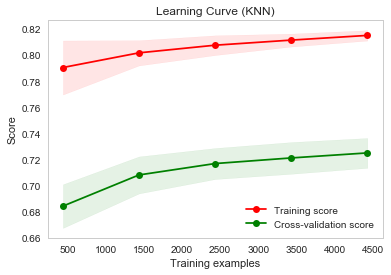

In [35]:
sns.set(style="whitegrid")

X, y = df_X, df_y


title = "Learning Curve (KNN)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=23732)

estimator = KNeighborsClassifier(n_neighbors= 5, p=2)
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)

plt.show()

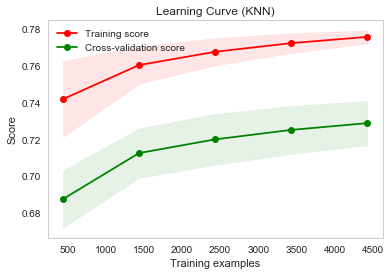

In [36]:
sns.set(style="whitegrid")

X, y = df_X, df_y


title = "Learning Curve (KNN)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=23732)

estimator = KNeighborsClassifier(n_neighbors= 10, p=2)
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)

plt.show()

k = 5 has higher variance than k=10 but k=10 gives us better trade-off between variance and bias, hence generalizing in a better way.

In [37]:
knn = KNeighborsClassifier(n_neighbors= 10, p=2)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

Confusion matrix, without normalization
[[723  98]
 [258 304]]
Normalized confusion matrix
[[ 0.88  0.12]
 [ 0.46  0.54]]


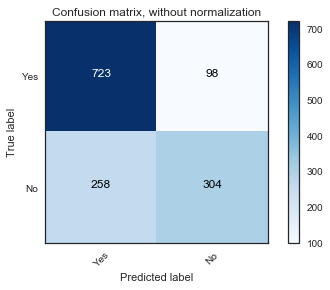

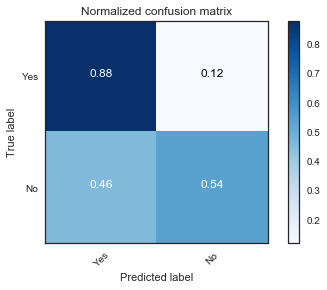

In [38]:
sns.set_style('white')

## Confusion Matrix
class_names = ['Yes', 'No']

y_pred = knn.predict(X_test)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

## Comparison Between Various Algorithms from Assignments

| **Algorithm**       | **True Positive Rate** |
|---------------------|------------------------|
| SVM                 | 0.86                   |
| Decision Tree       | 0.74                   |
| Boosting (AdaBoost) | 0.80                   |
| Neural Network      | 0.83                   |
| KNN                 | 0.88                   |

Our top performing algorith till now has been KNN and SVM. They outperform other algorithms because of the following reasons:  
- Our data is linearly seperable nd hence suited for SVM  
- Data represents consumer behavior, KNN finds users most similar to each other and hence suited for the given problem statement
    